In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

# <b><font size="7" color="red">ch10. N차원 배열(Numpy 배열) 다루기</font></b>
- [numpy](http://www.numpy.org)
- [numpy docs](https://numpy.org/doc/stable/)
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)

# 1장 넘파이 패키지

In [5]:
# np.arange(from,stop,by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성
import numpy as np
a = np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [25]:
from numpy import arange
a = arange(15, dtype=np.int8).reshape(3, 5) # 3행 5열짜리 2차원 배열로 변환
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [21]:
type(a) # a변수의 타입

numpy.ndarray

In [26]:
a.dtype # a배열의 요소들의 type

dtype('int8')

In [23]:
a.dtype.name

'int64'

In [27]:
a.itemsize # a배열안의 한 요소의 bytesize

1

## 1.2 배열 타입 변경

In [28]:
a = arange(12).reshape(3,4)

In [29]:
a.size

12

In [30]:
a.dtype

dtype('int32')

In [31]:
a.dtype = np.int64 # 읽을 때 int64로(64bit씩) 읽는다

In [32]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [34]:
# 배열요소의 타입을 수정
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [40]:
a.astype('int64')
# a.astype(np.int64)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [41]:
a.ravel() # flatten된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
a.flatten() # 함수의 결과가 return되면 배열 수정안함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## 1.3 배열 저장
- pkl(객체저장, 배열, 머신러닝 모델) vs npy(넘파이 전용 포맷, io속도개선)

In [43]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [47]:
%%time
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a,f)

CPU times: total: 0 ns
Wall time: 778 µs


In [48]:
%%time
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)

CPU times: total: 0 ns
Wall time: 7.4 ms


In [46]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [49]:
%%time
np.save('data/ch10.npy', a) # 저장

CPU times: total: 0 ns
Wall time: 6.62 ms


# 2장 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list, tuple)를 배열로 변환
- 기타함수들 : arange, ones, zeros, full, empty....linspace
- 랜덤값을 갖는 함수들 : np.random.~
## 2.1 arrat()함수로 넘파이 배열 만들기
    - array(ob), dtype=np.XX나 'XX', copy=T/F)

In [50]:
a = np.array([2, 4, 6], dtype=np.int16) # 정수의 기본타입은 int32
a

array([2, 4, 6])

In [51]:
for i in a:
    print(i, end="\t")

2	4	6	

In [55]:
b = np.array([[1.5, 2.3],[4, 5]]) # 배열은 동일 자료형의 집합 : 정수->실수->문자
b[0][1], b[0,1] # 2차원 [axis0행, axis1열]

(2.3, 2.3)

In [54]:
l = [[1.5,2.3],[4,5]]
l[0][1]

2.3

In [56]:
print(b.dtype) # 점수 기본타입은 int32, 실수 기본타임은 float64
print(b.itemsize)

float64
8


In [58]:
b.astype(np.float32) # 함수의 결과를 return하면 a는 그대로

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [59]:
for row in b:
    for item in row:
        print(item, end='\t')
    print() # 개행

1.5	2.3	
4.0	5.0	


In [62]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print(f'{i}행{j}열 : {item}({b[i,j]})', end='\t')
    print()

0행0열 : 1.5(1.5)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


In [64]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int16)

In [65]:
b[0,1]

2

In [ ]:
b[3,0] #없는 인덱싱시 에러

In [82]:
b[0:2,1:3], b[0:3,4:5], b[2], b[2,:4]

(array([[2, 3],
        [7, 8]], dtype=int16),
 array([[ 5],
        [10],
        [15]], dtype=int16),
 array([11, 12, 13, 14, 15], dtype=int16),
 array([11, 12, 13, 14], dtype=int16))

In [93]:
print('0~1행, 1~2열 :\n',b[0:2,1:3])
print('2행모두(1차원) :', b[2])
print('2행모두(2차원) :', b[2:3])
print('4열(마지막)모두 :', b[:,-1])
print('2행 0~3열 :', b[2,:4])
print('마지막열 제외 :\n', b[:,:-1])

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행모두(1차원) : [11 12 13 14 15]
2행모두(2차원) : [[11 12 13 14 15]]
4열(마지막)모두 : [ 5 10 15]
2행 0~3열 : [11 12 13 14]
마지막열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [94]:
# numpy 배열
import numpy as np
c = np.array([[1,2],[3,4]])
# d = c # 주소할당
d = np.array(c, copy=True) # 깊은 복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))

## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype속성을 따로 지정 가능

In [102]:
x = np.zeros((3,))
x

array([0., 0., 0.])

In [103]:
x = np.zeros((5,5), dtype=np.int16)
print(x)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [97]:
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [104]:
np.ones((3,5), dtype=np.uint8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [99]:
np.full((3,5),3)

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

<function matplotlib.pyplot.show(close=None, block=None)>

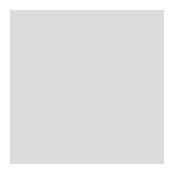

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 시각화한 그래프 크기 figsize(가로,세로)
img = np.full((16,16), 220, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # 축없애기
plt.show

In [120]:
np.empty((4,5)) # 초기값이 메모리 상태에 따라 다름

array([[0. , 0. , 0.3, 1. , 0. ],
       [0. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 1. ]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.randem.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값 배열
- np.randem.uniform(low=0.0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0.0, scale=1.0 size=tup) : 평균loc와 표준편자 scale을 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열발생 (난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차1)

<function matplotlib.pyplot.show(close=None, block=None)>

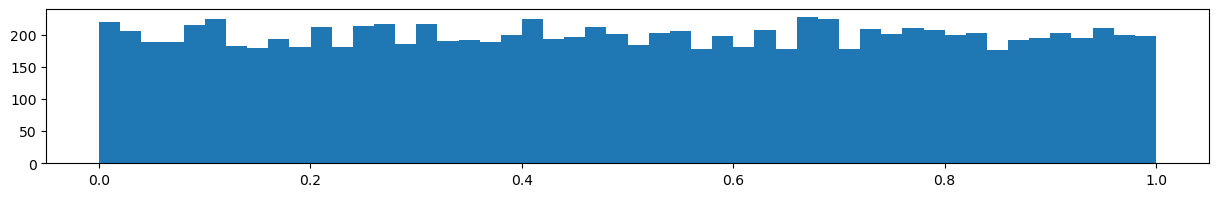

In [130]:
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프크기
plt.hist(x, bins=50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

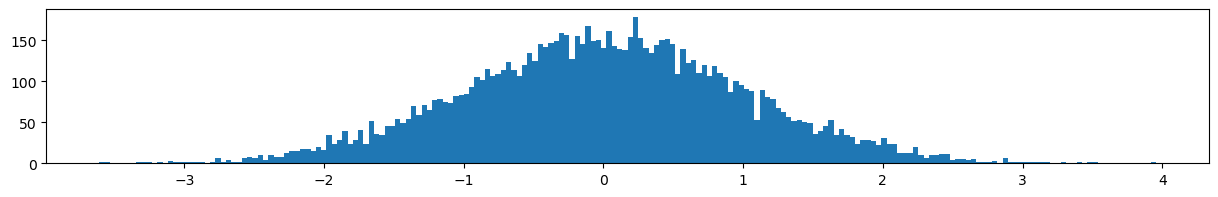

In [136]:
x = np.random.randn(10000)
plt.figure(figsize=(15,2)) # 그래프크기
plt.hist(x, bins=200)
plt.show

In [137]:
# 1차원 난수 배열
print(np.random.rand(3)) # 균등분포
print(np.random.randn(3)) # 정규분포

[0.59527723 0.46948358 0.07878675]
[-0.86381714  2.85661206  1.81796213]


In [140]:
# 2차원 난수 배열
np.random.random((2,5)) # 2행5열짜리 균등분포(0~1미만) 난수 배열

array([[0.97490358, 0.84397944, 0.5095081 , 0.58661725, 0.95389683],
       [0.99638937, 0.68905032, 0.59801708, 0.93058369, 0.30500013]])

In [145]:
np.random.uniform(low=-2, high=2, size=(2,5)) # 2행5열짜리 균등분포(-2~2미만) 난수 배열

array([[-1.52451986, -1.8171217 , -1.83025623, -1.1617836 , -1.40675458],
       [-1.64052271, -0.20179824,  1.25466396, -1.58977515, -1.54345115]])

In [144]:
np.random.normal(size=(2,5)) # 2행5열짜리 정규분포(평균0, 표준편차1) 난수 배열

array([[ 0.10346613,  0.67032601, -1.57028628,  1.25123065, -0.53513595],
       [ 0.54362658, -0.29163902, -0.78866811, -0.64240492, -0.78626487]])

In [146]:
np.random.normal(-1,1,(2,5)) # 2행5열짜리 정규분포(평균-1, 표준편차1) 난수 배열

array([[-1.6118378 , -2.79636253,  0.66247233, -2.50573938,  0.33725408],
       [-1.54963918, -1.25803517, -1.70323035, -0.19087395, -2.03077338]])

## 2.4 연속된 값을 갖는 1차원 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from, to, num) : from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성

In [147]:
np.arange(10, 30, 1, dtype='int8')

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29], dtype=int8)

In [148]:
np.linspace(0, 5, 5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [3]:
# linspace : 특정한 범위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(1, 2*pi, 1000)
y = np.sin(x)

NameError: name 'np' is not defined

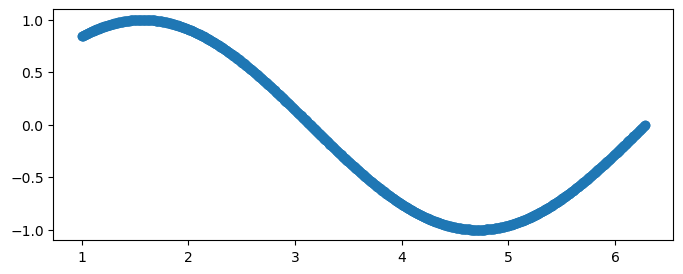

In [155]:
plt.figure(figsize=(8, 3))
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원 변경
- reshape(행수, 열수) : -1 가능
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [5]:
t = np.random.random( (2,3) )
t

array([[0.56783639, 0.31858394, 0.66127766],
       [0.43645374, 0.98273692, 0.04167776]])

In [6]:
a = np.round(t*10) # 반올림
a

array([[ 6.,  3.,  7.],
       [ 4., 10.,  0.]])

In [7]:
a.reshape(-1, 1) # -1이 주어지면 해당차원의 크기가 자동 계산

array([[ 6.],
       [ 3.],
       [ 7.],
       [ 4.],
       [10.],
       [ 0.]])

In [ ]:
a.resize(2, 3) # 실행결과가 출력 안 되면 a가 바뀜
a

In [ ]:
a.resize(2, -1) # resize는 -1 사용 불가

In [ ]:
# 전치행렬 (x행y열->y행x열)
a.T # a의 전치행렬

In [ ]:
a.transpose() # a의 전치행렬

## 2.6 배열 출력

In [9]:
np.arange(1001)

array([   0,    1,    2, ...,  998,  999, 1000])

In [10]:
# 배열 요소가 몇개까지 다 출력되나. 1000개 요소 이상은 생략되서 출력
np.get_printoptions()['threshold']

1000

In [11]:
# 배열이 커서 인쇄가 안되는 경우 : 모서리부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [12]:
# 인쇄 옵션 변경
import sys
np.set_printoptions(threshold=sys.maxsize) # 정수 최대치까지 출력가능
np.set_printoptions(threshold=np.inf) # 무한대까지 출력가능

In [14]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

## 2.7 기본 연산 동작
### 1) 배열의 요소별 연산

In [15]:
import numpy as np
# 리스트
a = [10,20,30,40]
b = list(range(4))
a + b, a*3

([10, 20, 30, 40, 0, 1, 2, 3],
 [10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40])

In [16]:
a = np.array([10,20,30,40])
b = np.arange(4)
a, b

(array([10, 20, 30, 40]), array([0, 1, 2, 3]))

In [17]:
a + b # 요소별 연산

array([10, 21, 32, 43])

In [18]:
a * 3 # 요소별 *3 연산

array([ 30,  60,  90, 120])

In [19]:
a * b # 요소별 * 연산

array([  0,  20,  60, 120])

In [20]:
a ** b # 요소별 제곱연산

array([    1,    20,   900, 64000])

In [21]:
a < 40 # 각 요소별 연산

array([ True,  True,  True, False])

In [24]:
a[[0,3]] # 0,3번째 인덱스 item
a[[True, False, False, True]] # 0은 True, 1은 False, 2은 False, 3은 True

array([10, 40])

In [25]:
# a배열에서 40보다 작은 데이터만 추출
a[a<40]

array([10, 20, 30])

In [26]:
# a배열에서 40보다 작은 데이터의 insex
np.where(a<40)

(array([0, 1, 2], dtype=int64),)

### 2) 행렬의 곱(@, dot함수)
cf. *(요소별 곱)

In [27]:
A = np.array([[1,1],[0,1]])
B = np.array([[2,0],[3,4]])
A, B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [30]:
print('요소별 곱 A*B =', A*B, sep='\n')
print('행렬곱 A@B =', A@B, sep='\n')
print('행렬곱 A.dot(B) =', A.dot(B), sep='\n')

요소별 곱 A*B =
[[2 0]
 [0 4]]
행렬곱 A@B =
[[5 4]
 [3 4]]
행렬곱 A.dot(B) =
[[5 4]
 [3 4]]


In [32]:
# 일반적으로는 행렬곱은 교환법칙이 성립 안함
print('A@B =', A@B, sep='\n')
print('B@A =', B@A, sep='\n')

A@B =
[[5 4]
 [3 4]]
B@A =
[[2 2]
 [3 7]]


In [33]:
np.eye(2) #2행2열짜리 단위행렬

array([[1., 0.],
       [0., 1.]])

### 3) 복합 대입 연산자 사용(+=,-=,*=, ...)
- 배열에서의 a += b는 a = a+b와 다소 다르게 작동

In [37]:
a = np.ones((2,3), dtype='int8') # 2행3열짜리 int8 배열
b = np.random.random((2,3)) # 2행3열짜리 randem값(0부터 1미만의 균등분포를 갖는) 배열
print(a,b, sep='\n')

[[1 1 1]
 [1 1 1]]
[[0.92637349 0.66957325 0.80057131]
 [0.59014604 0.19785749 0.5008416 ]]


In [38]:
a += 256 # a+256결과를 a에 넣는데, 공간이 부족하면 앞이 짤림
a

array([[1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [39]:
a = a+256 # a+256결과를 새로운 a에 할당
a

array([[257, 257, 257],
       [257, 257, 257]], dtype=int16)

In [40]:
b += a # b+a의 결과를 b에 넣는다
b

array([[257.92637349, 257.66957325, 257.80057131],
       [257.59014604, 257.19785749, 257.5008416 ]])

### 4) 배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편차)

In [7]:
a = np.array([[2,2,2,3],[4,3,2,1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [8]:
print('전체 합 :', a.sum(), np.sum(a))
print('전체 평균 :', a.mean(), np.mean(a))
print('전체 최소값 :', a.min(), np.min(a))
print('전체 최대값 :', a.max(), np.max(a))
print('전체 분산 :', a.var(), np.var(a))
print('전체 표준편차 :', a.std(), np.std(a))

전체 합 : [6 5 4 4] 19
전체 평균 : 2.375 2.375
전체 최소값 : 1 1
전체 최대값 : 4 4
전체 분산 : 0.734375 0.734375
전체 표준편차 : 0.8569568250501305 0.8569568250501305


In [45]:
# 분산에 루트를 씌우면 표준편차
import math
math.sqrt(a.var()) # math.sqrt(스칼라데이터)

0.8569568250501305

### 5) 배열 축별 집계
- 축별 sum, min, max, mean, var, std, argmax(최대값index)

In [48]:
# 행렬 합계 : axis=0(행), axis=1(열)
print('a 행렬 합 :', a.sum(axis=1), np.sum(a, axis=1))
print('a 행렬 평균 :', a.mean(axis=1), np.mean(a, axis=1))

a 행렬 합 : [ 9 10] [ 9 10]
a 행렬 평균 : [2.25 2.5 ] [2.25 2.5 ]


In [49]:
# 열별 합계 : 열을 고정하고 행(axis0축)들의 합
print('a 열별 합 :', a.sum(axis=0), np.sum(a, axis=0))

a 열별 합 : [6 5 4 4] [6 5 4 4]


## 2.8 그 외 요소별 계산하는 범용함수들
- 메모리를 효율적으로 사용할 수 있음
    * np.add(A,B,C) C=A+B C=np.add(A,B)
    * np.multiply(A,B,C) C=A*B C=np.multiply(A,B)
    * np.subtract(A,B,C)
    * np.sqrt(배열) : 제곱근 cf math.sqrt(스칼라변수)

In [59]:
a = np.array([1,2])
b = np.array([3,4])
c = np.empty((2,))
a,b,c

(array([1, 2]), array([3, 4]), array([4., 6.]))

In [60]:
np.add(a,b,c)
c

array([4., 6.])

In [68]:
# 메모리 사용량과 속도 측정을 해주는 메모리 프로파일러를 로드
# 아나콘다 프롬프트에서 pip install 라이브러리이름(memory_profiler)
%load_ext memory_profiler
A = np.random.randn(1000)
B = np.random.randn(1000)
C = np.random.randn(1000)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [69]:
%%time
%memit G = A*B+C
print(G)

peak memory: 625.11 MiB, increment: 0.01 MiB
[-1.02687735e+00 -2.79928715e+00 -3.61319918e+00 -1.95277806e+00
  4.50112399e-01  1.81913603e+00  4.03655259e+00  1.61125174e+00
 -6.80862273e-01  3.18241237e-01  2.31463997e+00  1.05284030e+00
  1.62795551e-01 -1.70457698e+00 -8.28769370e-01 -1.17136083e+00
 -2.94942894e-01  1.39041611e-01  1.13218702e+00 -1.89663282e+00
  3.03457497e+00 -9.29300799e-01  1.72841533e+00 -8.67475387e-01
 -7.13235946e-01 -1.55777465e+00 -3.96744077e-01  6.17756940e-01
 -3.00140783e-03 -3.55726661e-01 -4.99235214e-01  7.76961055e-01
  3.41153574e-01 -1.36882976e+00  2.63525454e+00 -2.70293997e+00
 -1.03149008e+00  1.91023874e+00 -1.10414510e+00  4.05381323e-02
 -1.31850011e+00  4.97226722e-01 -2.78786482e-01 -4.77411047e-01
 -2.80578697e-01 -4.04262129e-01  1.28875683e+00  3.01431120e-01
 -1.82325511e-01  8.42145981e-01  6.59968113e-01 -2.29884954e-01
 -3.41187533e-03  2.26774728e+00  4.75679178e-02 -1.00321316e-01
 -1.46547272e+00  9.41464709e-01 -3.27423357e

In [70]:
%%time
%memit np.multiply(A,B,G); np.add(G,C,G)
print(G)

peak memory: 625.12 MiB, increment: 0.00 MiB
[-1.02687735e+00 -2.79928715e+00 -3.61319918e+00 -1.95277806e+00
  4.50112399e-01  1.81913603e+00  4.03655259e+00  1.61125174e+00
 -6.80862273e-01  3.18241237e-01  2.31463997e+00  1.05284030e+00
  1.62795551e-01 -1.70457698e+00 -8.28769370e-01 -1.17136083e+00
 -2.94942894e-01  1.39041611e-01  1.13218702e+00 -1.89663282e+00
  3.03457497e+00 -9.29300799e-01  1.72841533e+00 -8.67475387e-01
 -7.13235946e-01 -1.55777465e+00 -3.96744077e-01  6.17756940e-01
 -3.00140783e-03 -3.55726661e-01 -4.99235214e-01  7.76961055e-01
  3.41153574e-01 -1.36882976e+00  2.63525454e+00 -2.70293997e+00
 -1.03149008e+00  1.91023874e+00 -1.10414510e+00  4.05381323e-02
 -1.31850011e+00  4.97226722e-01 -2.78786482e-01 -4.77411047e-01
 -2.80578697e-01 -4.04262129e-01  1.28875683e+00  3.01431120e-01
 -1.82325511e-01  8.42145981e-01  6.59968113e-01 -2.29884954e-01
 -3.41187533e-03  2.26774728e+00  4.75679178e-02 -1.00321316e-01
 -1.46547272e+00  9.41464709e-01 -3.27423357e

## 2.9 브로드 케이스팅
- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해주는 강력한 기능

In [71]:
a = np.array([1,2,3])
b = 10
print(a+b) #요소별 연산
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [72]:
# 1차원 배열의 브로드 캐스팅
a = np.array([1,2,3])
b = np.array([10])
print(a+b) #요소별 연산
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [74]:
# 2차원 배열의 브로드 캐스팅
a = np.array([[0,0,0],[10,10,10],[20,20,20],[30,30,30]]) # 4행 3열짜리 2차원 배열
b = np.array([0,1,2]) #3열짜리 1차원
np.add(a,b), np.multiply(a,b)

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 array([[ 0,  0,  0],
        [ 0, 10, 20],
        [ 0, 20, 40],
        [ 0, 30, 60]]))

In [76]:
# 2차원 배열의 브로드 캐스팅
a = np.array([[0,0,0],[10,10,10],[20,20,20],[30,30,30]]) # 4행 3열짜리 2차원 배열
b = np.array([[0],[1],[2],[3]]) #3열짜리 1차원
np.add(a,b), np.multiply(a,b)

(array([[ 0,  0,  0],
        [11, 11, 11],
        [22, 22, 22],
        [33, 33, 33]]),
 array([[ 0,  0,  0],
        [10, 10, 10],
        [40, 40, 40],
        [90, 90, 90]]))

In [78]:
# a,b를 모든 쌍 조합에 대해 계산을 하고 싶을 때(브로드캐스팅 이용)
a = np.array([0,10,20,30]) #4열짜리 1차원 배열
b = np.array([1,2,3])
# 1차원 배열 a를 2차원 배열로 
A = a.reshape(4,1)
A = a[:. np.newaxis] # newaxis를 이용하여 배열의 새로운 축을 추가하여 2차원
A = np.expand_dims(a, axis=1)
A

array([[ 0],
       [10],
       [20],
       [30]])

In [79]:
A+b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [80]:
a = np.array([0,10,20,30])
b = np.array([1,2,3])
A,B = np.ix_(a,b)
A,B

(array([[ 0],
        [10],
        [20],
        [30]]),
 array([[1, 2, 3]]))

In [81]:
A+B

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

# 3장 배열합치기 / 배열 분리하기
- 슬라이싱
- 두 배열을 합치는 함수
- r__,c__
- 하나의 배열을 여러개 작은 배열로 분리하는 함수
## 3.1 슬라이싱

In [83]:
c = np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [84]:
c[0,2,1]

9

In [85]:
c[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [86]:
c[1,0]

array([12, 13, 14, 15])

In [102]:
c[:,1:3,2:]

array([[[ 6,  7],
        [10, 11]],

       [[18, 19],
        [22, 23]]])

In [101]:
c[1,0:3,1]

array([13, 17, 21])

## 3.2 두개 이상의 배열을 쌓아 합치는 함수
- vstack(tup) : 아래로 추가하는 방식
- hstack(tup) : 옆으로 추가하는 방식
- dstack(tup) : 마지막 축(열)을 쌓아 합침(차원 증가)

In [2]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.array((a,b))
print('vstack 아래로 추가하여 합치기 :', v, v.shape, sep='\n')
h = np.hstack((a,b))
print('hstack 옆으로 추가하여 합치기 :', h, h.shape, sep='\n')
d = np.dstack((a,b))
print('dstack 축을 depth로 합치기 :', d, d.shape, sep='\n')

NameError: name 'np' is not defined

In [106]:
c = np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [107]:
np.concatenate((a,b), axis=0) # axis=0이 기본값

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [108]:
# 옆으로 합치기
np.hstack((a,b))

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [109]:
np.concatenate((a,b), axis=1)

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- column_stack(tup) : 1차원 배열을 2차원 배열의 열단위로 합침. dstack과 비교
- row_stack(tup) : 행단위로 합침==vstack()

In [110]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.column_stack((a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [111]:
np.dstack((a,b,c)).reshape(4,3)

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [ ]:
# 행쌓기
np.row

- stack(tup, axis=n) : axis=0:첫번째차원(2차원일때는 행, 3차원일때는 면), axis=1(열)

In [112]:
a = np.arange(12).reshape(3,4)
b = np.arange(12,24).reshape(3,4)
a,b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [115]:
# a의 행과 b의 행이 열로 합쳐서 면을 이름
np.stack((a,b), axis=-1)

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_
- 나열 객체

In [118]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.r_[a,b,c] # 한 행

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [120]:
np.r_[[a],[b],[c]]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [121]:
np.c_[a,b,c] # 컬럼단위로 쌓아줌

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [122]:
np.column_stack((a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## 3.4 배열을 분리하는 함수
- vsplit(ary, 정수나 백터) : 첫번째 축을 따라 분할(2차원의 경우 가로축 분할)
- hsplit(ary, 정수나 백터) : 두번째 축을 따라 분할(2차원의 경우 세로축 분할)
- dsplit(ary, 정수나 백터) : depth를 따라 분할(3차원이상에서만 동작)
    * 정수 n : n개로 분리
    * [n] : n번째 인덱스를 기점으로 분리
    * [m,n] : m번쩨, n번째 인덱스를 기점으로 분리

In [123]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

- split(ary, 갯수나 인덱스백터, axis=?)
- array_split(ary, 갯수나 인덱스백터, axis=?)
    * axis=0 : vsplit() 동일
    * axis=1 : hsplit() 동일
    * axis=2 : dsplit() 동일
    * array_split : 나눠지지 않는 정수로도 사용 가능

In [124]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [125]:
np.split(a, 2, axis=0) # axis=0 : 0번축 기준으로 분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [126]:
np.split(a, 2, axis=1) # axis=1 : 1번축 기준으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [127]:
np.array_split(a, 2, axis=1)

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [128]:
# np.split(a, 3, axis=1) 에러
np.array_split(a, 3, axis=1) # 나눠서 떨어지지 않는 수로도 분리가능

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]